<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Ranidu-Gurusinghe/EAPS_Data_Describing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/SL Apparel Industry Dataset.xlsx')
df.head()


Mounted at /content/drive


,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
0,2021-12-01,Shift A,AA369,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
1,2021-12-01,Shift A,AA362,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
2,2021-12-01,Shift A,AA359,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
3,2021-12-01,Shift A,AA541,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
4,2021-12-01,Shift A,AA398,Team - MAT 3A - BD,Informed,Notified,NaN,1.0,MAT,Maternity


In [ ]:
df.tail()

,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
110532,2023-12-22,Shift A,AA3659,Sewing Team - 140A - I - BD,Informed,Notified,NaN,1.0,Absent,Medical Leave
110533,2023-12-22,Shift A,AA3719,Sewing Team - 106A - I - BD,Uninformed,Not Notified,NaN,1.0,Absent,VOP
110534,2023-12-22,Shift A,AA3845,Team - MAT 1A - BD,Informed,Notified,NaN,1.0,Absent,Maternity
110535,2023-12-22,Shift A,AA3984,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,Absent,Maternity
110536,2023-12-22,Shift A,AA4098,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,Absent,Maternity


In [ ]:
df.shape

(110537, 10)

In [ ]:
df.columns

Index(['Date', 'Shift', 'Code', 'Department', 'Absenteeism Type', 'Status',
       'Reason Mapping', 'Leave Type', 'Absent/Present', 'Reason'],
      dtype='object')

In [ ]:
df.isna().sum()

Date                     0
Shift                    0
Code                     0
Department              10
Absenteeism Type       826
Status                 832
Reason Mapping      110537
Leave Type              79
Absent/Present          27
Reason                   0
dtype: int64

In [ ]:
df.duplicated(keep="first").sum()

2016

##Exploratory Data Analysis

In [ ]:
df.describe(include='all')

<ipython-input-9-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
count,110537,110537,110537,110527,109711,109705,0.0,110458.000000,110510,110537
unique,572,7,3796,304,4,3,NaN,NaN,3,26
top,2021-12-26 00:00:00,Shift B,AA663,Team - MAT 1B - BD,Informed,Notified,NaN,NaN,Absent,Personal Reason
freq,1244,56658,260,2730,78881,85601,NaN,NaN,101388,30116
first,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.986384,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082622,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [ ]:
for column in df.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {df[column].nunique()}")


===============Column: Date==============
Number of unique values: 572
===============Column: Shift==============
Number of unique values: 7
===============Column: Code==============
Number of unique values: 3796
===============Column: Department==============
Number of unique values: 304
===============Column: Absenteeism Type==============
Number of unique values: 4
===============Column: Status==============
Number of unique values: 3
===============Column: Reason Mapping==============
Number of unique values: 0
===============Column: Leave Type==============
Number of unique values: 3
===============Column: Absent/Present==============
Number of unique values: 3
===============Column: Reason==============
Number of unique values: 26


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


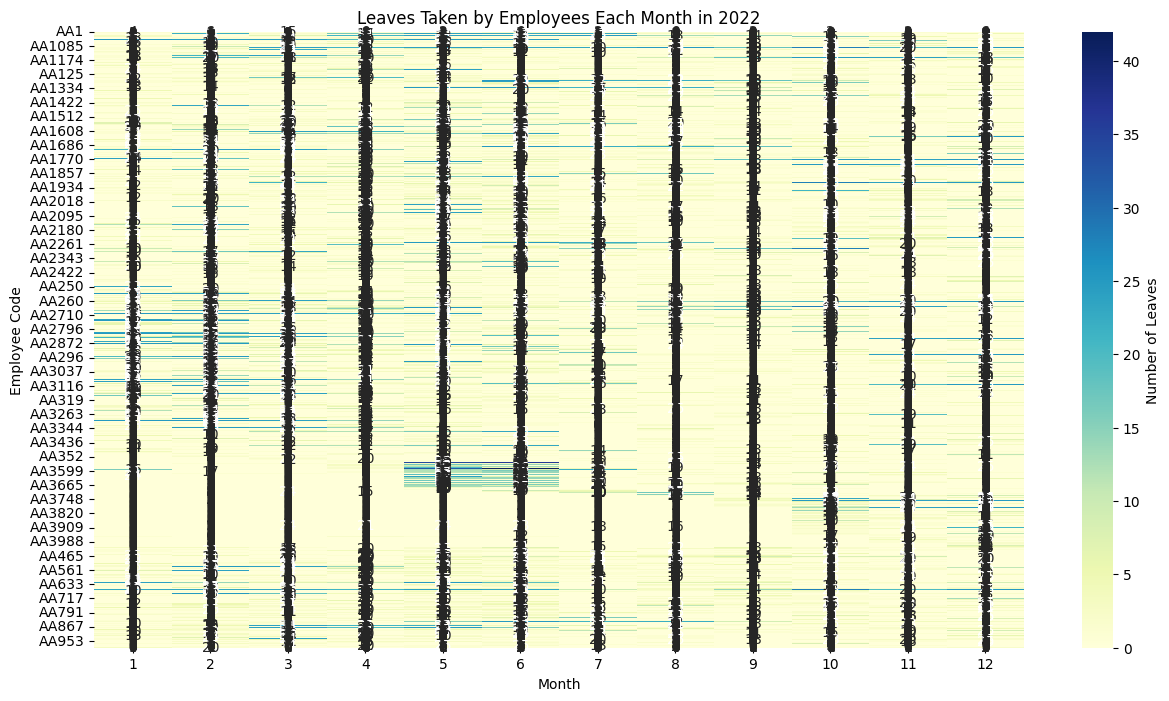

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Ranidu_preprocessed_dataset.xlsx', parse_dates=['Date'])

# Assuming 'Code' is the column containing employee codes
# Create new columns 'Year' and 'Month' to store the year and month of each entry
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Group by 'Code', 'Month', then count the number of entries (leaves) for each group
leaves_per_month_2022 = df_2022.groupby(['Code', 'Month']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(leaves_per_month_2022, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Leaves'})
plt.title('Leaves Taken by Employees Each Month in 2022')
plt.xlabel('Month')
plt.ylabel('Employee Code')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-ba32acba3cb2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaves_per_month_2022_all.index, y=leaves_per_month_2022_all.values, palette="viridis")


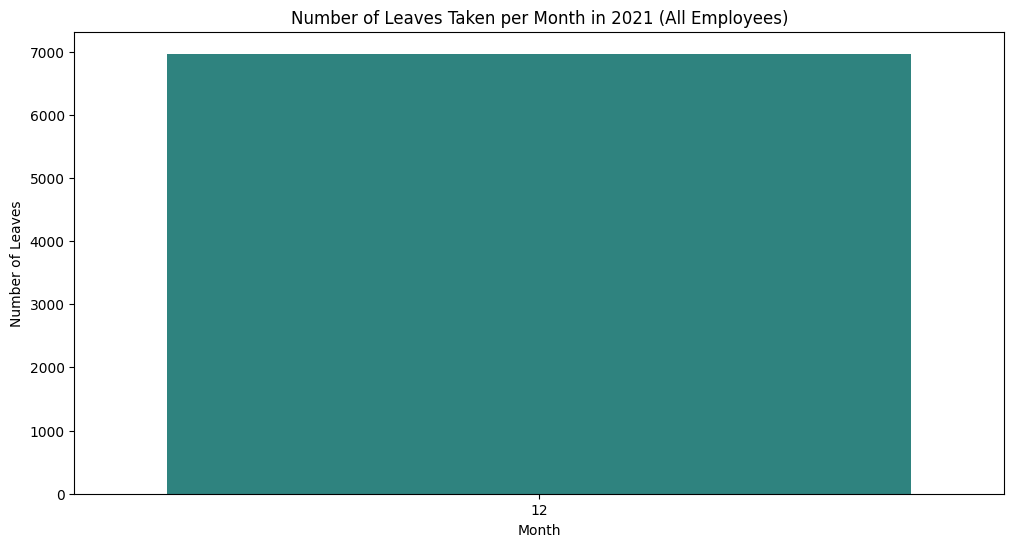

<ipython-input-8-ba32acba3cb2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaves_per_month_2022_all.index, y=leaves_per_month_2022_all.values, palette="viridis")


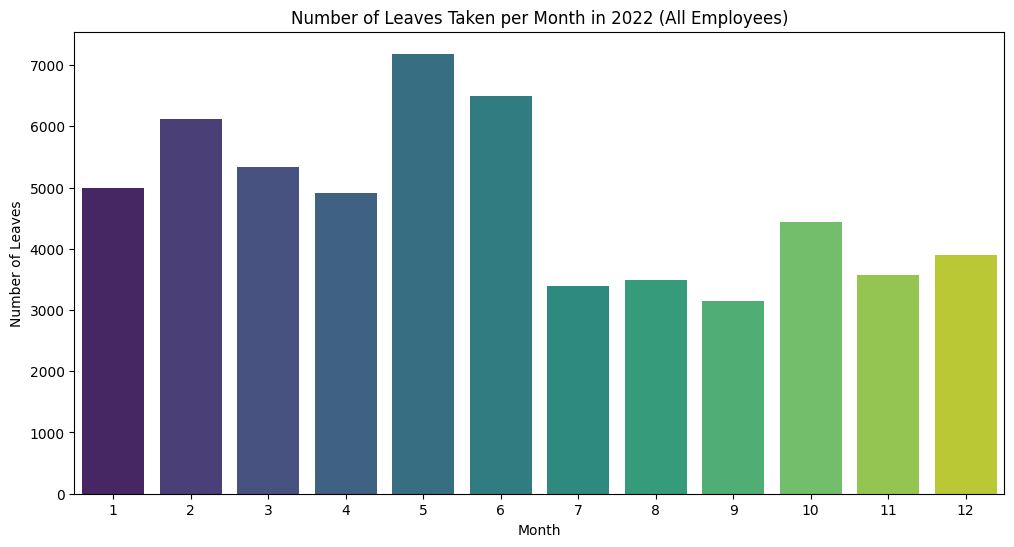

<ipython-input-8-ba32acba3cb2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaves_per_month_2022_all.index, y=leaves_per_month_2022_all.values, palette="viridis")


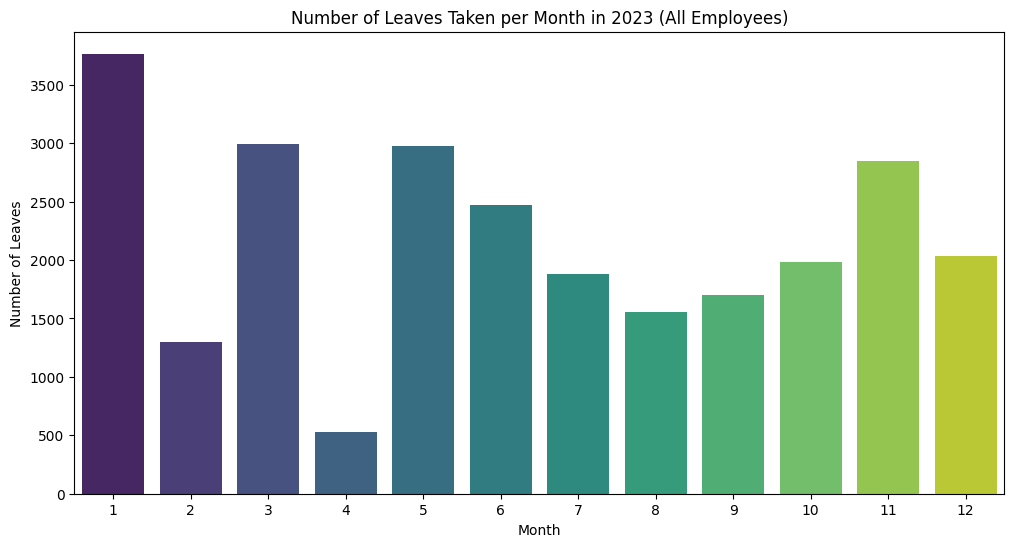

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Ranidu_preprocessed_dataset.xlsx', parse_dates=['Date'])

# Assuming 'Code' is the column containing employee codes
# Create new columns 'Year' and 'Month' to store the year and month of each entry
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
for i in range(0,3):
  # Filter data for the year 2022
  df_2022 = df[df['Year'] == 2021+i]

  # Group by 'Month', then count the number of entries (leaves) for each group
  leaves_per_month_2022_all = df_2022.groupby('Month').size()

  # Plot the graph
  plt.figure(figsize=(12, 6))
  sns.barplot(x=leaves_per_month_2022_all.index, y=leaves_per_month_2022_all.values, palette="viridis")
  plt.title(f'Number of Leaves Taken per Month in {2021+i} (All Employees)')
  plt.xlabel('Month')
  plt.ylabel('Number of Leaves')
  plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


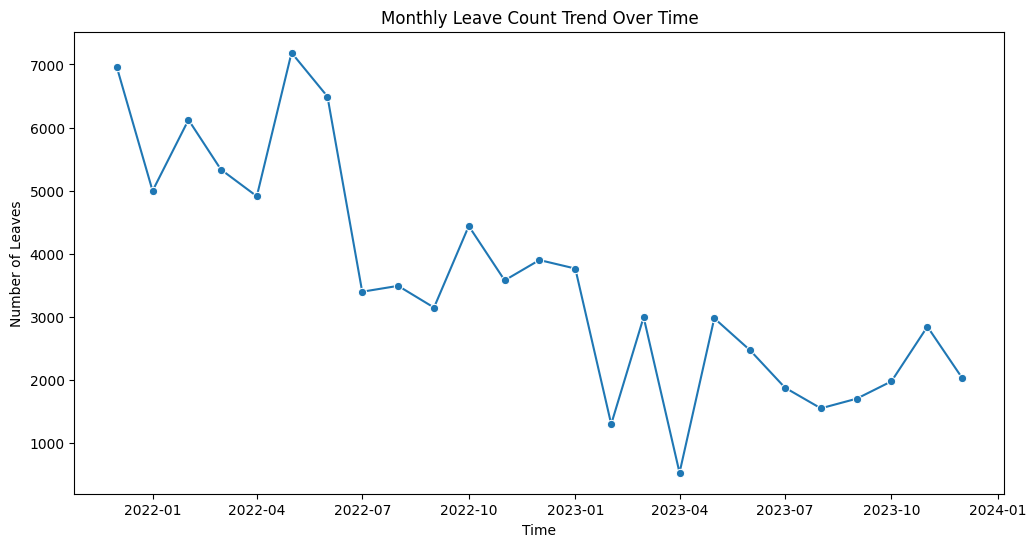

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Ranidu_preprocessed_dataset.xlsx', parse_dates=['Date'])

# Assuming 'Code' is the column containing employee codes
# Create new columns 'Year' and 'Month' to store the year and month of each entry
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by 'Year', 'Month', then count the number of entries (leaves) for each group
monthly_leave_count = df.groupby(['Year', 'Month']).size().reset_index(name='NumLeaves')

# Convert 'Year' and 'Month' to a datetime format for continuous plotting
monthly_leave_count['Date'] = pd.to_datetime(monthly_leave_count[['Year', 'Month']].assign(DAY=1))

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_leave_count['Date'], y=monthly_leave_count['NumLeaves'], marker='o')
plt.title('Monthly Leave Count Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Leaves')
plt.show()
